# Exercise: Skill Pay Analysis
- Compare skill with high demand and skill with high high paid by yearly median salary

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [67]:
job_title = 'Data Analyst'
job_country = 'United States'
df_DA = df[(df['job_title_short'] == job_title) & (df['job_country'] == job_country)].copy()
df_DA = df_DA.dropna(subset='salary_year_avg')
df_DA = df_DA.explode('job_skills')

df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


### Calculating MEDIAN and COUNT

In [68]:
df_stats = df_DA.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_stats_count_sort = df_stats.sort_values(by='count', ascending=False)
df_stats_median_sort = df_stats.sort_values(by='median', ascending=False)

In [69]:
df_stats_count_sort = df_stats_count_sort.head(10)
df_stats_count_sort

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


In [70]:
df_stats_median_sort = df_stats_median_sort.head(10)
df_stats_median_sort

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


### Plotting with bar chart

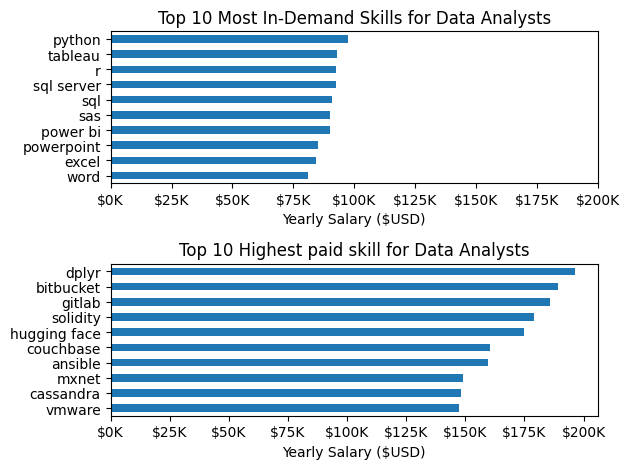

In [74]:
fig, ax = plt.subplots(2,1)

# Top 10 Highest Paid Skills for Data Analysts
df_stats_count_sort.sort_values(by='median',ascending=False).plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[0].invert_yaxis()
ax[0].set_xlabel('Yearly Salary ($USD)')
ax[0].set_ylabel('')
ax[0].set_xlim(0,200000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}K"))

# Top 10 Most In-Demand Skills for Data Analysts
df_stats_median_sort.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Highest paid skill for Data Analysts')
ax[1].invert_yaxis()
ax[1].set_xlabel('Yearly Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}K"))

fig.tight_layout()